## Exploratory Data Analysis of Ted Talk's Historical Data

Based on the dataset shared here at https://www.kaggle.com/code/ashishjangra27/ted-talk-analysis/data. 

We have tried to answer the following questions:
 -   Finding the most popular TED talks
 -   Finding the most popular TED talks Speaker (in terms of number of talks)
 -   Month-wise Analysis of TED talk frequency
 -   Year-wise Analysis of TED talk frequency
 -   Finding TED talks of your favorite Author
 -   Finding TED talks with the best view to like ratio
 -   Finding TED talks based on tags (like climate)
 -   Finding the most popular TED talks Speaker (in terms of number of views)

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
pd.set_option('max_colwidth', 100)
df = pd.read_csv(r"C:\Users\v-aksshetty\Downloads\TedTalkData\data.csv")
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_climate_action_needs_new_frontline_leadership
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_history_of_the_overthrow_of_hawaii
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_can_spark_new_ideas_for_your_business
3,Why is China appointing judges to combat climate change?,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_china_appointing_judges_to_combat_climate_change
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s_carbon_problem_and_2_ways_to_fix_it


In [3]:
df.shape

(5440, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [5]:
df.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [6]:
df.author.isnull().sum()

1

In [7]:
df.dropna(inplace = True)

In [8]:
df.author.isnull().sum()

0

In [9]:
df.columns

Index(['title', 'author', 'date', 'views', 'likes', 'link'], dtype='object')

In [10]:
# 1. Finding the most popular TED talks in terms of number of views

df.sort_values("views", ascending = False).head()

,title,author,date,views,likes,link
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_schools_kill_creativity
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_mind_of_a_master_procrastinator
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_leaders_inspire_action
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of_vulnerability


In [11]:
# 2. Finding the most popular TED talks Speaker (in terms of number of talks)
df.author.value_counts().sort_values(ascending=False)

Alex Gendler            45
Iseult Gillespie        33
Matt Walker             18
Alex Rosenthal          15
Elizabeth Cox           13
                        ..
Chris Jordan             1
Yann Arthus-Bertrand     1
Liz Coleman              1
Michelle Obama           1
Rick Warren              1
Name: author, Length: 4443, dtype: int64

In [12]:
# 3. Month-wise Analysis of TED talk frequency

In [13]:
df.dtypes

title     object
author    object
date      object
views      int64
likes      int64
link      object
dtype: object

In [14]:
df.date

0        December 2021
1        February 2022
2       September 2021
3         October 2021
4         October 2021
             ...      
5435     February 2006
5436     February 2006
5437     February 2006
5438     February 2006
5439     February 2006
Name: date, Length: 5439, dtype: object

In [15]:
date_split = df.date.str.split(" ", expand = True)

In [16]:
date_split.head()

,0,1
0,December,2021
1,February,2022
2,September,2021
3,October,2021
4,October,2021


In [17]:
date_split.columns = ["month", "year"]

In [18]:
date_split.head()

,month,year
0,December,2021
1,February,2022
2,September,2021
3,October,2021
4,October,2021


In [19]:
df = pd.concat([df, date_split], axis = 1)

In [20]:
df.head(3)

,title,author,date,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_climate_action_needs_new_frontline_leadership,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_history_of_the_overthrow_of_hawaii,February,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_can_spark_new_ideas_for_your_business,September,2021


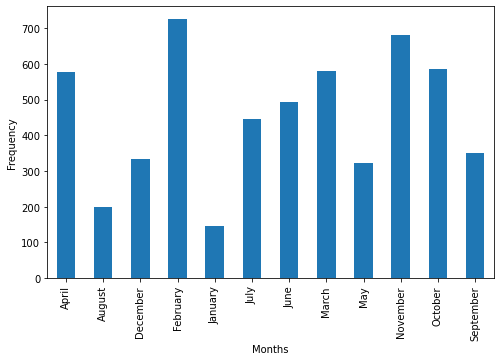

In [21]:
plt.figure(figsize = (8, 5))
#df.groupby(['year']).size().reset_index(name='counts').sort_index()
df.month.value_counts().sort_index(ascending=True).plot.bar()
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

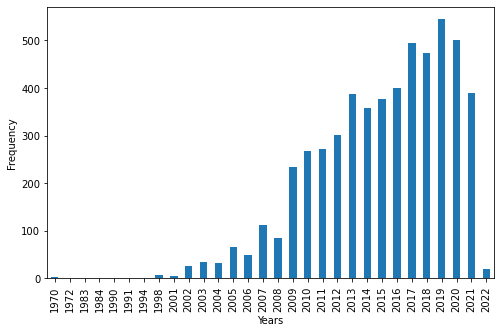

In [22]:
# 4. Year-wise Analysis of TED talk frequency

plt.figure(figsize = (8, 5))
#df.groupby(['year']).size().reset_index(name='counts').sort_index()
df.year.value_counts().sort_index(ascending=True).plot.bar()
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.show()

In [23]:
# 5. Finding TED talks of your favorite Author

df[df["author"] == "Sir Ken Robinson"]

,title,author,date,views,likes,link,month,year
422,"How would you finish the sentence, ""Imagine if...""?",Sir Ken Robinson,March 2021,254000,7600,https://ted.com/talks/sir_ken_robinson_how_would_you_finish_the_sentence_imagine_if,March,2021
3872,How to escape education's death valley,Sir Ken Robinson,April 2013,11000000,351000,https://ted.com/talks/sir_ken_robinson_how_to_escape_education_s_death_valley,April,2013
4609,Changing education paradigms,Sir Ken Robinson,October 2010,2400000,73000,https://ted.com/talks/sir_ken_robinson_changing_education_paradigms,October,2010
4750,Bring on the learning revolution!,Sir Ken Robinson,February 2010,10000000,302000,https://ted.com/talks/sir_ken_robinson_bring_on_the_learning_revolution,February,2010
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_schools_kill_creativity,February,2006


In [24]:
# 6. Finding TED talks with the best view to like ratio

df['ratio'] = df['views']/df['likes']
df.head()

,title,author,date,views,likes,link,month,year,ratio
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_climate_action_needs_new_frontline_leadership,December,2021,33.666667
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_history_of_the_overthrow_of_hawaii,February,2022,33.437500
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_can_spark_new_ideas_for_your_business,September,2021,34.333333
3,Why is China appointing judges to combat climate change?,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_china_appointing_judges_to_combat_climate_change,October,2021,35.583333
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s_carbon_problem_and_2_ways_to_fix_it,October,2021,33.333333


In [25]:
# 7. Finding TED talks based on tags(like climate)

In [26]:
tag = "climate"
tag_values = []
climate = df.values
for i in range(len(climate)):
    if tag in climate[i][0].lower():
        tag_values.append(climate[i][0])
        

In [27]:
tag_values

['Climate action needs new frontline leadership',
 'Why is China appointing judges to combat climate change?',
 "The ocean's ingenious climate solutions",
 "How we're reducing the climate impact of electronics",
 'How to boost nature-based solutions to climate change',
 'The unexpected, underwater plant fighting climate change',
 "Language shouldn't be a barrier to climate action",
 "It's time to write a new climate story",
 'Use your voice, vote and wallet for climate action',
 'A next-generation solution to climate crisis',
 'Community investment is the missing piece of climate action',
 'Dear world leaders, these are our climate demands',
 'An action plan for solving the climate crisis',
 'Can climate change ever be funny? 17 comedians try to answer',
 'The crucial intersection of climate and capital',
 'The powerful women on the front lines of climate action',
 'How small countries can make a big impact on climate change',
 'How to make radical climate action the new normal',
 'The

In [28]:
# 8. Finding the most popular TED talks Speaker (in terms of number of views)
df.sort_values(by = 'views', ascending=False).head()

,title,author,date,views,likes,link,month,year,ratio
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_schools_kill_creativity,February,2006,34.285714
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are,June,2012,33.684211
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_mind_of_a_master_procrastinator,February,2016,33.333333
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_leaders_inspire_action,September,2009,33.529412
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of_vulnerability,June,2010,32.941176


## Summary

Based on our EDA the following are our observations:

- The most popular Ted Talk is 'Do schools kill creativity' by Sir Ken Robinson with over 72 million views!
- The most popular Ted Talk by the total numbers of talks is Alex Gendler. He has delivered 45 talks to date!
- The month with the highest frequency of Ted Talks is February followed by November.
- The highest number of Ted Talks took place in the year 2019 followed by 2020.
- We found that our favourite author Sir Ken Robinson has delivered 5 Ted Talks till date. His first talk was 'Do Schools kill creativity?' which also happens to be the most watched Ted Talk of all time.
- Top 3 Ted Talks with the best Views to Likes ratios are 'A camera that can see around corners', What's the point(e) of ballet? and 'How to see more and care less: The art of Georgia O'Keeffe'. They had a ratio of 36.4.
- Generated 92 Title names results from a string search using the keyword 'Climate'.
- The Ted Talk speaker with the highest number of views is our favourite Sir Ken Robinson (72M+views).


Links to our profiles:
 - Kaggle - https://www.kaggle.com/akshaykshetty | https://www.kaggle.com/akshaykshetty
 - Github - https://github.com/akshaykshetty     | https://github.com/Lovepreet12a